In [1]:
# Import the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
dataset = pd.read_csv('C:/Users/Sony/Desktop/Data-Science-Training/5. Classification/Social_Network_Ads.csv')

In [3]:
dataset.head()

Age  EstimatedSalary  Purchased
0   19            19000          0
1   35            20000          0
2   26            43000          0
3   27            57000          0
4   19            76000          0

In [4]:
import seaborn as sns

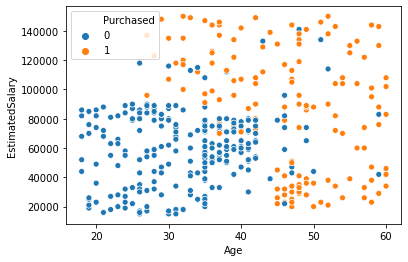

In [5]:
sns.scatterplot(x = dataset['Age'], y =dataset['EstimatedSalary'], hue = dataset['Purchased'])
plt.show()

# Seperate the Indepdent and Dependent Variable

In [6]:
X = dataset.iloc[ : , 0:2] # Independent Variable

In [7]:
y = dataset.iloc[ : , 2:3] # Target Variable / Dependent Var

In [8]:
X.head()

Age  EstimatedSalary
0   19            19000
1   35            20000
2   26            43000
3   27            57000
4   19            76000

In [9]:
y.head()

Purchased
0          0
1          0
2          0
3          0
4          0

# Divide the data into Training (80%) and Testing (20%) set

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train , y_test = train_test_split( X, y, test_size = 0.2, random_state = 0)

In [12]:
X_train.shape, X_test.shape

((320, 2), (80, 2))

# Feature Scaling on the data

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
sc = StandardScaler()

In [15]:
# Scaled our Training data
X_train_scaled = sc.fit_transform(X_train)

In [16]:
pd.DataFrame(X_train_scaled).head()

0         1
0  1.922950  2.146016
1  2.020161  0.378719
2 -1.382215 -0.432499
3 -1.187794 -1.011940
4  1.922950 -0.925024

In [17]:
# Sale our Test data
X_test_scaled = sc.transform(X_test)

In [18]:
pd.DataFrame(X_test_scaled).head()

0         1
0 -0.798951  0.494608
1 -0.021265 -0.577359
2 -0.312897  0.146943
3 -0.798951  0.262831
4 -0.312897 -0.577359

# Model Building

In [19]:
from sklearn.svm import SVC # Support Vector for Classification problem

In [20]:
svm_classifier = SVC(C = 1.0, kernel='linear') # linear kernel

In [21]:
# Train my model
svm_classifier.fit(X_train_scaled, y_train.values)

C:\Users\Sony\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [22]:
# Predict / Test the result
y_pred = svm_classifier.predict(X_test_scaled)

In [23]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1], dtype=int64)

# Model Evaluation

In [24]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [25]:
print("Confusion Matrix: ")

Confusion Matrix: 


In [26]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[57,  1],
       [ 6, 16]], dtype=int64)

In [27]:
svm_classifier.score(X_test_scaled, y_test)

0.9125

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94        58
           1       0.94      0.73      0.82        22

    accuracy                           0.91        80
   macro avg       0.92      0.86      0.88        80
weighted avg       0.91      0.91      0.91        80



# Plot the SVM Linear Kernel

In [30]:
# from matplotlib.colors import ListedColormap

# X_set, y_set = sc.inverse_transform(X_train_scaled), y_train

# X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
#                      np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))

# plt.contourf(X1, X2, svmClassifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
#              alpha = 0.75, cmap = ListedColormap(('red', 'green')))
# plt.xlim(X1.min(), X1.max())
# plt.ylim(X2.min(), X2.max())

# for i, j in enumerate(np.unique(y_set)):
#     plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)

#     plt.title('SVM (Training set)')
# plt.xlabel('Age')
# plt.ylabel('Estimated Salary')
# plt.legend()
# plt.show()


## Change the Kernel RBF

In [31]:
svm_classifier_1 = SVC(C = 1.0, kernel='rbf') # rbf kernel

In [32]:
svm_classifier_1.fit(X_train_scaled, y_train)

C:\Users\Sony\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [33]:
y_pred_rbf = svm_classifier_1.predict(X_test_scaled)

In [34]:
# Model Evaluation

In [35]:
cm = confusion_matrix(y_test, y_pred_rbf)

In [36]:
cm

array([[55,  3],
       [ 1, 21]], dtype=int64)

In [38]:
print(classification_report(y_test, y_pred_rbf))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        58
           1       0.88      0.95      0.91        22

    accuracy                           0.95        80
   macro avg       0.93      0.95      0.94        80
weighted avg       0.95      0.95      0.95        80



In [ ]:
# from matplotlib.colors import ListedColormap

# X_set, y_set = sc.inverse_transform(X_train_scaled), y_train

# X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
#                      np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))

# plt.contourf(X1, X2, svmClassifier_1.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
#              alpha = 0.75, cmap = ListedColormap(('red', 'green')))
# plt.xlim(X1.min(), X1.max())
# plt.ylim(X2.min(), X2.max())

# for i, j in enumerate(np.unique(y_set)):
#     plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)

#     plt.title('SVM (Training set)')
# plt.xlabel('Age')
# plt.ylabel('Estimated Salary')
# plt.legend()
# plt.show()
